# Books and Wings

## **Data Collection**

### Web Scraping Amazon
##### At this step we are going to collect data directly from Amazon. Making this step will demand analyze the HTML from Amazon site. Note that this HTMLs are constantly changing, therefore this code can be old. The most important is understand and adapt to the day you are using.

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from time import sleep

import requests
from bs4 import BeautifulSoup

headers = {
    'Host': 'www.amazon.com',
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:70.0) Gecko/20100101 Firefox/70.0',
    'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8',
    'Accept-Language': 'en-US,en;q=0.5',
    'Accept-Encoding': 'gzip, deflate, br',
    'Connection': 'keep-alive',
    'Upgrade-Insecure-Requests': '1',
    'TE': 'Trailers'
}

alls = []

for k in range(1,3):

  URL = "https://www.amazon.com/best-sellers-books-Amazon/zgbs/books/ref=zg_bs_pg_"+str(k)+"?_encoding=UTF8&pg="+str(k)
  page = requests.get(URL, headers=headers)
  soup = BeautifulSoup(page.content, "html.parser")

  i=0
  book = True

  while(book!=None):

    all = []

    try:

      book = soup.find(id="p13n-asin-index-"+str(i))
      job_elements = book.find_all("div", class_="_cDEzb_p13n-sc-css-line-clamp-1_1Fn1y")
      price = book.find_all("span", class_="_cDEzb_p13n-sc-price_3mJ9Z")
      number_of_rating = book.find_all("span", class_="a-size-small")
      rating = book.find_all("a", class_="a-link-normal")
      book_cover = book.find_all("span", class_="a-size-small a-color-secondary a-text-normal")

      all.append(job_elements[0].text.strip())
      all.append(job_elements[1].text.strip())
      all.append(price[0].text.strip())
      all.append(number_of_rating[0].text.strip())
      all.append(rating[2].text.strip())
      all.append(book_cover[0].text.strip())

    except:
      print("--------------------------",i,"-------------------------")

    i+=1

    alls.append(all)

-------------------------- 3 -------------------------
-------------------------- 10 -------------------------
-------------------------- 15 -------------------------
-------------------------- 30 -------------------------
-------------------------- 24 -------------------------
-------------------------- 25 -------------------------
-------------------------- 30 -------------------------


In [ ]:
df = pd.DataFrame(alls,columns=['Book Name','Author','Price','Customers_Rated', 'Rating', 'Book_cover'])
df.to_csv('amazon_products.csv', index=False, encoding='utf-8')

In [ ]:
df.tail()

,Book Name,Author,Price,Customers_Rated,Rating,Book_cover
57,Why a Daughter Needs a Mom: Celebrate Your Mot...,Gregory E. Lang,$6.89,"2,349","4.9 out of 5 stars 2,349",Hardcover
58,Berserk Deluxe Volume 1,Kentaro Miura,$29.99,Kentaro Miura,"4.9 out of 5 stars 7,958",Hardcover
59,Magnolia Table,Joanna Gaines,$16.59,"30,163","4.8 out of 5 stars 30,163",Hardcover
60,The Lincoln Highway: A Novel,Amor Towles,$18.00,"45,575","4.4 out of 5 stars 45,575",Hardcover
61,None,None,None,None,None,None


##### After collecting the data, we will proceed to the next step: data cleaning. Our goal is remove broken or NaN values from our table. 

### Data Cleaning

In [ ]:
import seaborn as sns
from matplotlib import pyplot as plt
import pandas as pd

##### Checking the data

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/DS/Portfolio/Books and Wings/Data/amazon_products.csv")
df.head()

,Book Name,Author,Price,Customers_Rated,Rating,Book_cover
0,Finding Me: A Memoir,Viola Davis,$18.84,314,4.8 out of 5 stars 314,Hardcover
1,Atomic Habits: An Easy & Proven Way to Build G...,James Clear,$11.98,"79,977","4.8 out of 5 stars 79,977",Hardcover
2,"This Will Not Pass: Trump, Biden, and the Batt...",Jonathan Martin,$24.99,4,4.2 out of 5 stars 4,Hardcover
3,Bill O'Reilly,NaN,NaN,NaN,NaN,NaN
4,Just Tyrus: A Memoir,Tyrus,$32.49,898,4.7 out of 5 stars 898,Hardcover


##### Six columns. Price and Rating column need be modified. We need to remove the $ character and also use split to get only the rating and not the all string. Our first decision is removing rows with NaN values.


In [ ]:
df_book = df.copy()

df_book = df_book.dropna()

In [ ]:
df_book['Price'] = df_book['Price'].map(lambda x: str(x)[1:])
df_book["Price"] = pd.to_numeric(df_book["Price"])

df_book['Customers_Rated'] = df_book['Customers_Rated'].str.replace(r'\D', '')
df_book["Customers_Rated"] = pd.to_numeric(df_book["Customers_Rated"])

df_book['Rating'] = df_book['Rating'].str[:3]
df_book["Rating"] = pd.to_numeric(df_book["Rating"])

df_book = df_book.dropna()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  after removing the cwd from sys.path.


In [ ]:
df_book

,Book Name,Author,Price,Customers_Rated,Rating,Book_cover
0,Finding Me: A Memoir,Viola Davis,18.84,314.0,4.8,Hardcover
1,Atomic Habits: An Easy & Proven Way to Build G...,James Clear,11.98,79977.0,4.8,Hardcover
2,"This Will Not Pass: Trump, Biden, and the Batt...",Jonathan Martin,24.99,4.0,4.2,Hardcover
4,Just Tyrus: A Memoir,Tyrus,32.49,898.0,4.7,Hardcover
5,Book Lovers,Emily Henry,13.60,21.0,4.6,Paperback
6,The Mothers and Daughters of the Bible Speak: ...,Shannon Bream,17.05,786.0,4.9,Hardcover
7,Johnny the Walrus,Matt Walsh,14.18,2620.0,4.9,Board book
8,Where the Crawdads Sing,Delia Owens,9.98,221019.0,4.8,Paperback
9,"Oh, the Places You'll Go!",Dr. Seuss,8.98,36141.0,4.9,Hardcover
11,It Ends with Us: A Novel (1),Colleen Hoover,11.17,88865.0,4.7,Paperback


###### After cleaning the data, now we have a suitable data to work and get our insights. We must have in mind that our goal is indicate the best books based on this data.

### Data Analysis

In [ ]:
import seaborn as sns
from matplotlib import pyplot as plt
import pandas as pd

In [ ]:
df_book = pd.read_csv("/content/drive/MyDrive/DS/Portfolio/Books and Wings/Data/amazon_products_cleaned.csv")

In [ ]:
df_book.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Book Name        52 non-null     object 
 1   Author           52 non-null     object 
 2   Price            52 non-null     float64
 3   Customers_Rated  52 non-null     float64
 4   Rating           52 non-null     float64
 5   Book_cover       52 non-null     object 
dtypes: float64(3), object(3)
memory usage: 2.6+ KB


In [ ]:
df_book.describe()

,Price,Customers_Rated,Rating
count,52.000000,52.000000,52.000000
mean,14.189231,33890.461538,4.703846
std,6.156220,44636.578482,0.193990
min,4.530000,1.000000,4.200000
25%,9.972500,455.750000,4.600000
50%,13.335000,11136.000000,4.700000
75%,18.067500,64642.000000,4.800000
max,34.680000,221019.000000,5.000000


In [ ]:
# duplicated rows
df_book.duplicated().sum()

0

In [ ]:
# rows that contain null values
df_book.shape[0]-df_book.dropna(axis = 0).shape[0]

0

In [ ]:
df_book.corr()

,Price,Customers_Rated,Rating
Price,1.000000,-0.263480,-0.289524
Customers_Rated,-0.263480,1.000000,-0.115459
Rating,-0.289524,-0.115459,1.000000


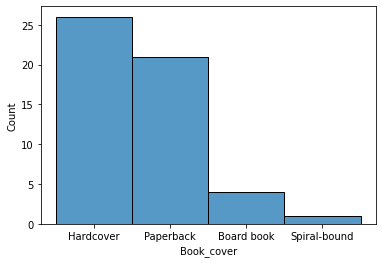

In [ ]:
sns.histplot(data=df_book, x="Book_cover")

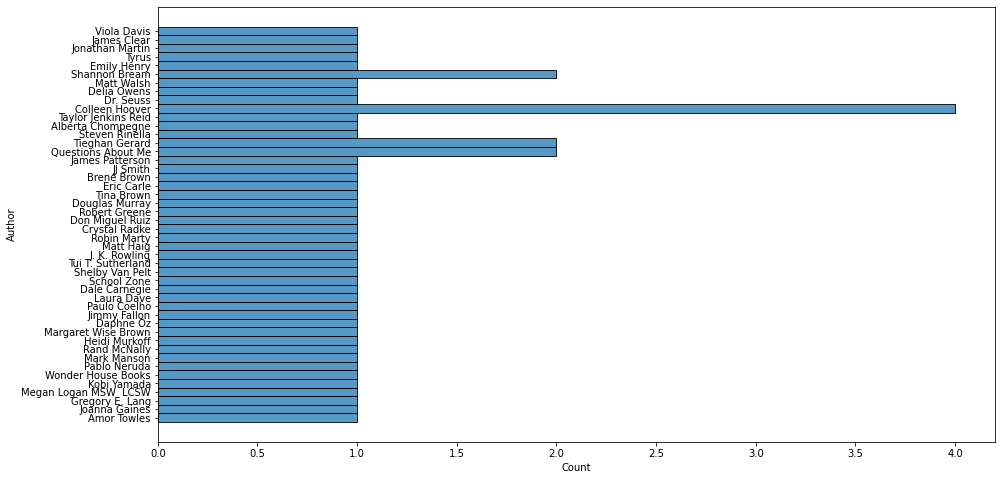

In [ ]:
plt.figure(figsize=(15,8))
sns.histplot(data=df_book, y="Author")

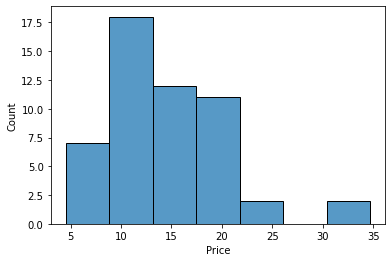

In [ ]:
sns.histplot(data=df_book, x="Price")

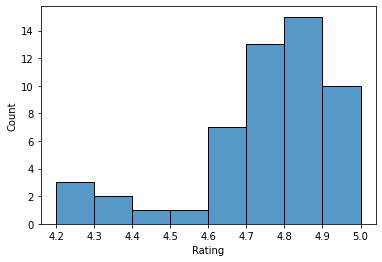

In [ ]:
sns.histplot(data=df_book, x="Rating")

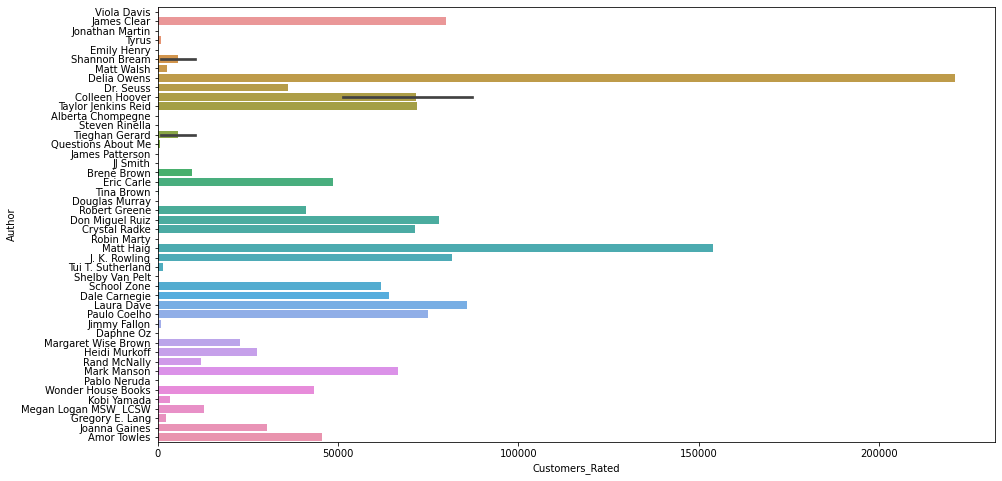

In [ ]:
plt.figure(figsize=(15,8))
sns.barplot(y="Author", x="Customers_Rated", data=df_book)

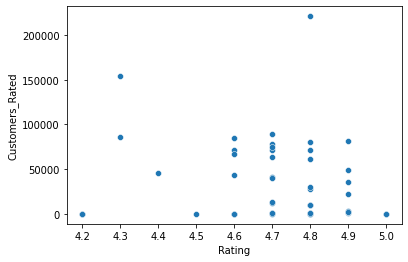

In [ ]:
sns.scatterplot(data=df_book, x="Rating", y="Customers_Rated")

In [ ]:
df_book.sort_values('Customers_Rated', ascending=False)[:10]

,Book Name,Author,Price,Customers_Rated,Rating,Book_cover
7,Where the Crawdads Sing,Delia Owens,9.98,221019.0,4.8,Paperback
29,The Midnight Library: A Novel,Matt Haig,13.29,153933.0,4.3,Hardcover
9,It Ends with Us: A Novel (1),Colleen Hoover,11.17,88865.0,4.7,Paperback
35,The Last Thing He Told Me: A Novel,Laura Dave,13.50,85754.0,4.3,Hardcover
10,Verity,Colleen Hoover,11.26,85090.0,4.6,Paperback
30,Harry Potter Paperback Box Set (Books 1-7),J. K. Rowling,34.68,81632.0,4.9,Paperback
1,Atomic Habits: An Easy & Proven Way to Build G...,James Clear,11.98,79977.0,4.8,Hardcover
25,The Four Agreements: A Practical Guide to Pers...,Don Miguel Ruiz,7.74,77926.0,4.7,Paperback
36,"The Alchemist, 25th Anniversary: A Fable About...",Paulo Coelho,8.89,74976.0,4.7,Paperback
11,The Seven Husbands of Evelyn Hugo: A Novel,Taylor Jenkins Reid,9.42,71973.0,4.6,Paperback


In [ ]:
df_book.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Book Name        52 non-null     object 
 1   Author           52 non-null     object 
 2   Price            52 non-null     float64
 3   Customers_Rated  52 non-null     float64
 4   Rating           52 non-null     float64
 5   Book_cover       52 non-null     object 
dtypes: float64(3), object(3)
memory usage: 2.6+ KB
